In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as axes3d
#import seaborn
import sympy as sm
sm.init_printing()

Κυλινδρικό ρολό χαρτί μήκους $h$ που αποτελείται από έναν πυρήνα ακτίνας $R_0$ και μάζας $M_0$ ξετυλίγειτε καθώς εκτοξέυεται απο ύψος $y_0$. Αρχικά το πάχος του ρολού είναι $R_E$ και το πάχος ενός φύλλου χαρτιού είναι $\delta$
Υπολογίστε τη τρόχια του. 

In [9]:
R0,M0,Re,d,t,h,w0,g,u0,y0,rhox=sm.symbols('R_0,M_0,R_E,\\delta,t,h,\\omega_0,g,u_0,y_0,\\rho_x',real=True,positive=True)

In [10]:
Vx=sm.Function('V_x',real=True)(t)
Vy=sm.Function('V_y',real=True)(t)
#M=sm.Function('V_x')(t)

Αριθμός περιστροφών δεδομένης γωνιακής ταχύτητας $\omega (t)$
$$
k(t) =\frac{\int _0 ^t \omega (t') dt'}{2\pi}
$$
άρα το πάχος του εξωτερικού στρώματος είναι
$$
R_{x}(t)=R_E - k(t) \delta
$$
και η συνολική μάζα του κυλίνδρου
$$
M(t)=M_0 +\rho _x h \pi R_{x}^2(t)
$$

In [104]:
w=w0 #estw statheri gwniaki taxyttita

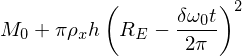

In [14]:
k= sm.integrate(w,t)/(2*sm.pi)
Rex=Re-d*k
M=M0+rhox*h*sm.pi*Rex**2
M

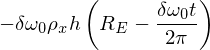

In [13]:
sm.diff(M,t)

Το σύστημα των διαφορικών εξισώσεων είναι:
\begin{align}
&\frac{d}{dt}\big(M(t) V_y \big)=-M(t)g \\
&\frac{d}{dt}\big(M(t) V_x \big)=0
\end{align}

In [61]:
eqy=sm.diff(Vy*M,t)+M*g#-Vy*sm.diff(M,t)/M
eqx=sm.diff(Vx*M,t)#+Vx*sm.diff(M,t)/M

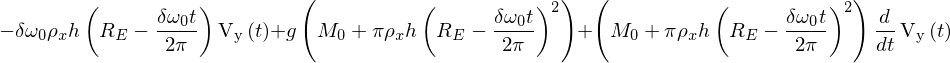

In [63]:
eqy

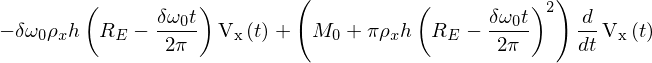

In [64]:
eqx

In [65]:
sub={R0:0.02,h:0.03,g:9.86,M0:0.020,w0:0.5*2.*np.pi,d:0.001,u0:5.0,rhox:1.5,Re:0.003,y0:100.}

In [66]:
sm.classify_ode(eqy)

('1st_exact',
 '1st_linear',
 'almost_linear',
 '1st_power_series',
 'lie_group',
 '1st_exact_Integral',
 '1st_linear_Integral',
 'almost_linear_Integral')

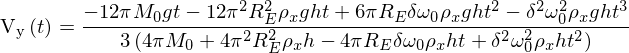

In [67]:
Vys=sm.dsolve(eqy,ics={Vy.subs(t,0):sm.Float(0)})#,ics={eqy.subs({t:0}):0})
Vys=Vys.subs('C1',0)
Vys

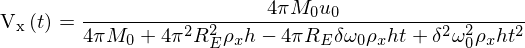

In [68]:
Vxs=sm.dsolve(eqx)
Vxs=Vxs.subs('C1',4*sm.pi*M0*u0)
Vxs

In [69]:
Vxs=Vxs.rhs
Vys=Vys.rhs

In [70]:
Vxn=sm.lambdify(t,Vxs.subs(sub),"numpy")
Vyn=sm.lambdify(t,Vys.subs(sub),"numpy")

In [105]:
tt=np.linspace(0,5)

In [106]:
from scipy.integrate import odeint

In [74]:
def Vxsn(y,t): return Vxn(t)
def Vysn(y,t): return Vyn(t)

In [78]:
xn=odeint(Vxsn,y0=0.,t=tt)
yn=odeint(Vysn,y0=100.,t=tt)

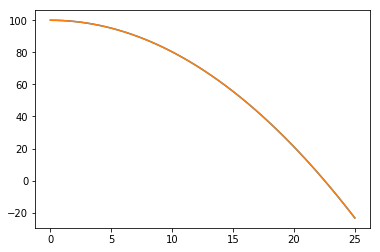

In [92]:
plt.plot(xn,yn)
plt.plot(5.0*tt,100.-(9.86/2.)*tt**2) #apli boli

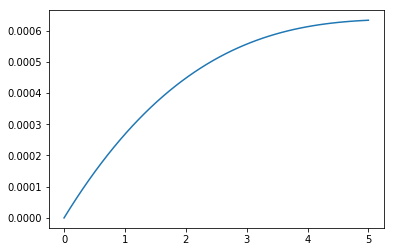

In [100]:
plt.plot(tt,np.abs(xn[:,0]-5.0*tt))

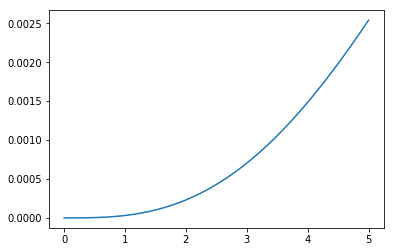

In [103]:
plt.plot(tt,np.abs(yn[:,0]-(100.-(9.86/2.)*tt**2)))